In [0]:
pip install lrl

In [0]:
from lrl import environments, solvers
from lrl.utils import plotting

import matplotlib.pyplot as plt

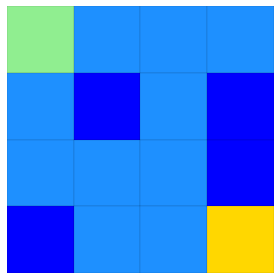

In [203]:
lake_sm = environments.frozen_lake.RewardingFrozenLakeEnv(map_name='4x4', is_slippery=True)
plotting.plot_env(env=lake_sm)

# Frozen Lake - Value Iteration

In [0]:
lake = environments.frozen_lake.RewardingFrozenLakeEnv(map_name='20x20', is_slippery=True)

In [0]:
plotting.plot_env(env=lake)

In [164]:
lake_vi = solvers.ValueIteration(env=lake, score_while_training=True)
lake_vi.iterate_to_convergence()
lake_vi.converged()

True

In [162]:
df_vi_conv = lake_vi.iteration_data.to_dataframe()
df_vi_conv.tail()

,iteration,time,delta_max,delta_mean,policy_changes,converged
31,31,0.007167,0.002304,0.000316,4,False
32,32,0.004889,0.001844,0.000271,5,False
33,33,0.004831,0.001446,0.000233,1,False
34,34,0.005266,0.001112,0.000199,4,False
35,35,0.004937,0.000841,0.000172,6,True


In [94]:
scoring_data_vi = lake_vi.score_policy(iters=100)
df_vi = scoring_data_vi.to_dataframe(include_episodes=True)
df_vi.tail(3)

,episode_index,reward,steps,terminal,reward_mean,reward_median,reward_std,reward_min,reward_max,steps_mean,steps_median,steps_std,steps_min,steps_max,terminal_fraction,episodes
97,97,-1.0,101,False,-0.880204,-1.0,0.379882,-1.93,0.34,99.346939,101.0,5.425003,68,101,0.122449,"[0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0..."
98,98,-1.0,101,False,-0.881414,-1.0,0.378148,-1.93,0.34,99.363636,101.0,5.400065,68,101,0.121212,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 21, 22, 23, 3,..."
99,99,-1.0,101,False,-0.882600,-1.0,0.376438,-1.93,0.34,99.380000,101.0,5.375463,68,101,0.120000,"[0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [108]:
df_vi['terminal'].value_counts()
#df_vi.loc[df_vi['terminal'] == True, :]
#list(df_vi.loc[16, 'episodes'])

False    88
True     12
Name: terminal, dtype: int64

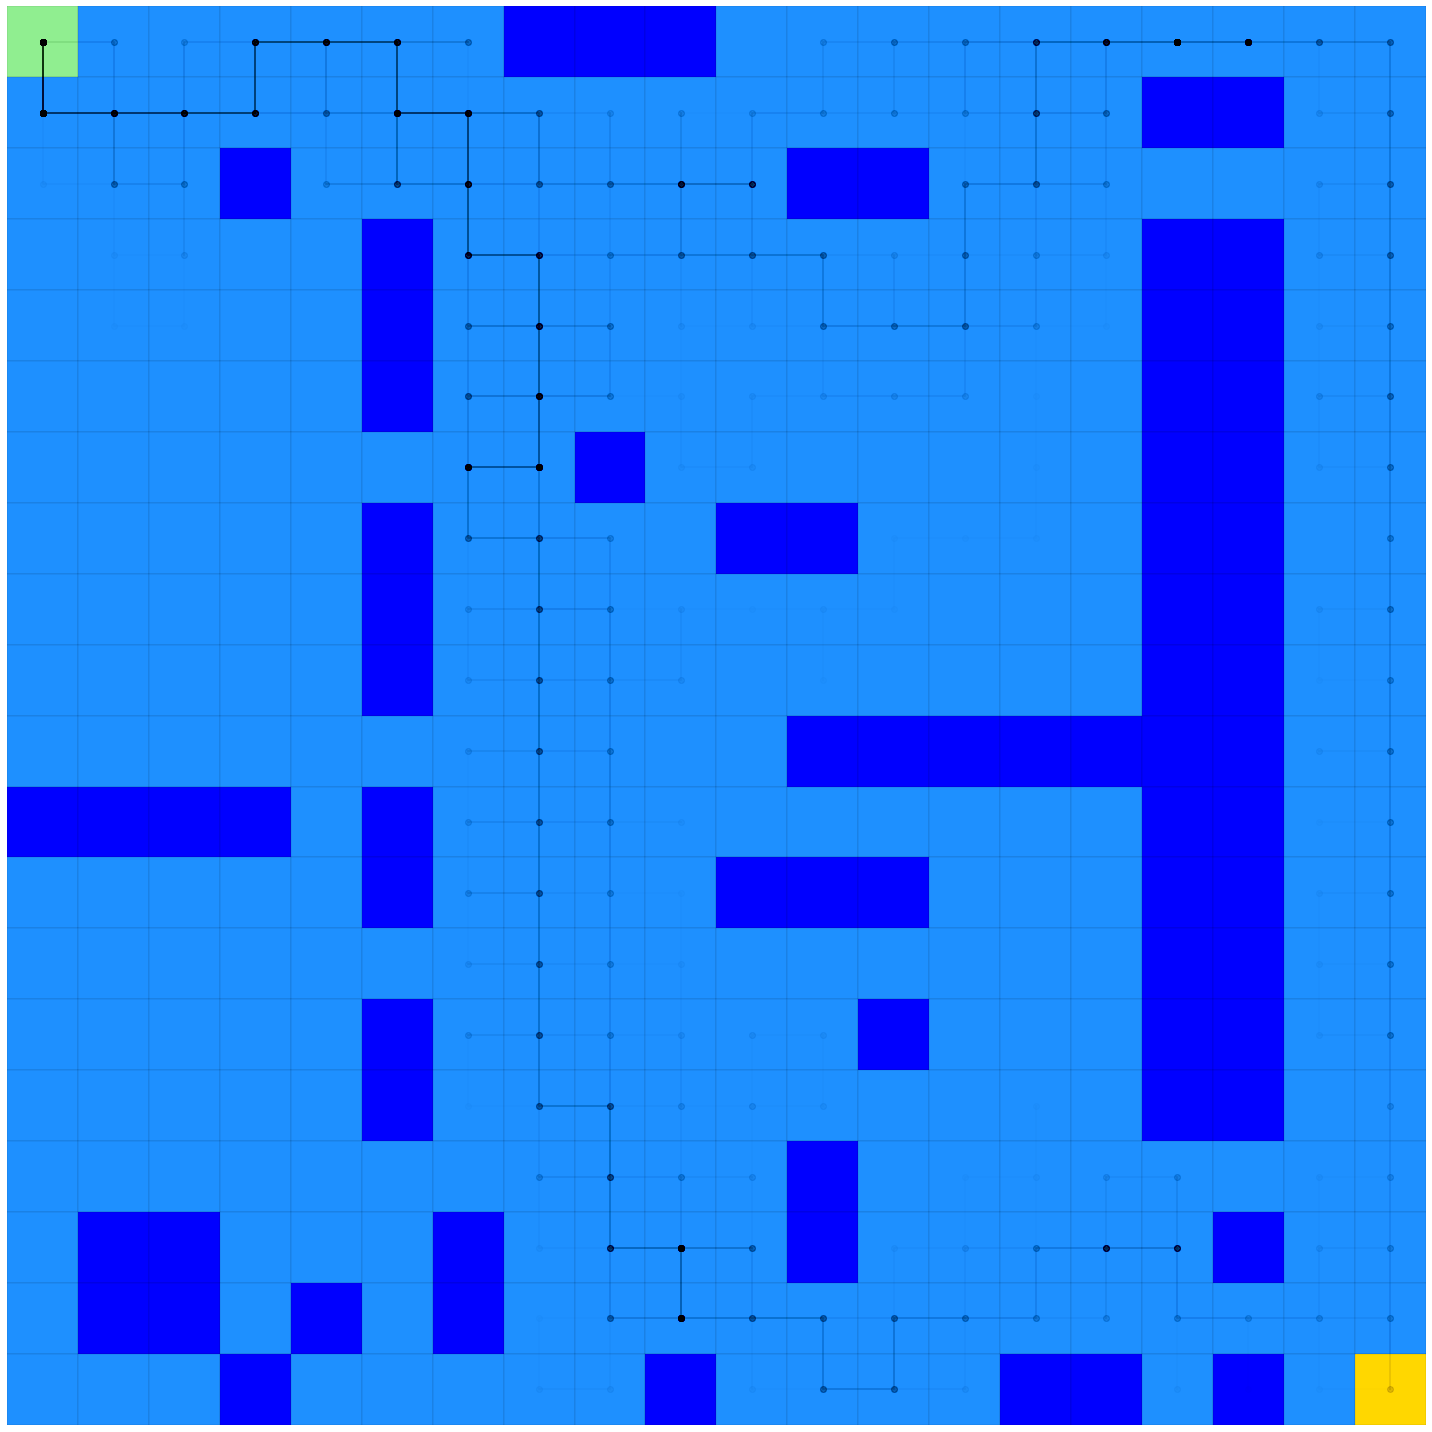

In [95]:
ax_episodes = plotting.plot_episodes(episodes=scoring_data_vi.episodes, env=lake, max_episodes=100, )

Text(0.5, 1.0, 'Frozen lake - Value Iteration - Results')

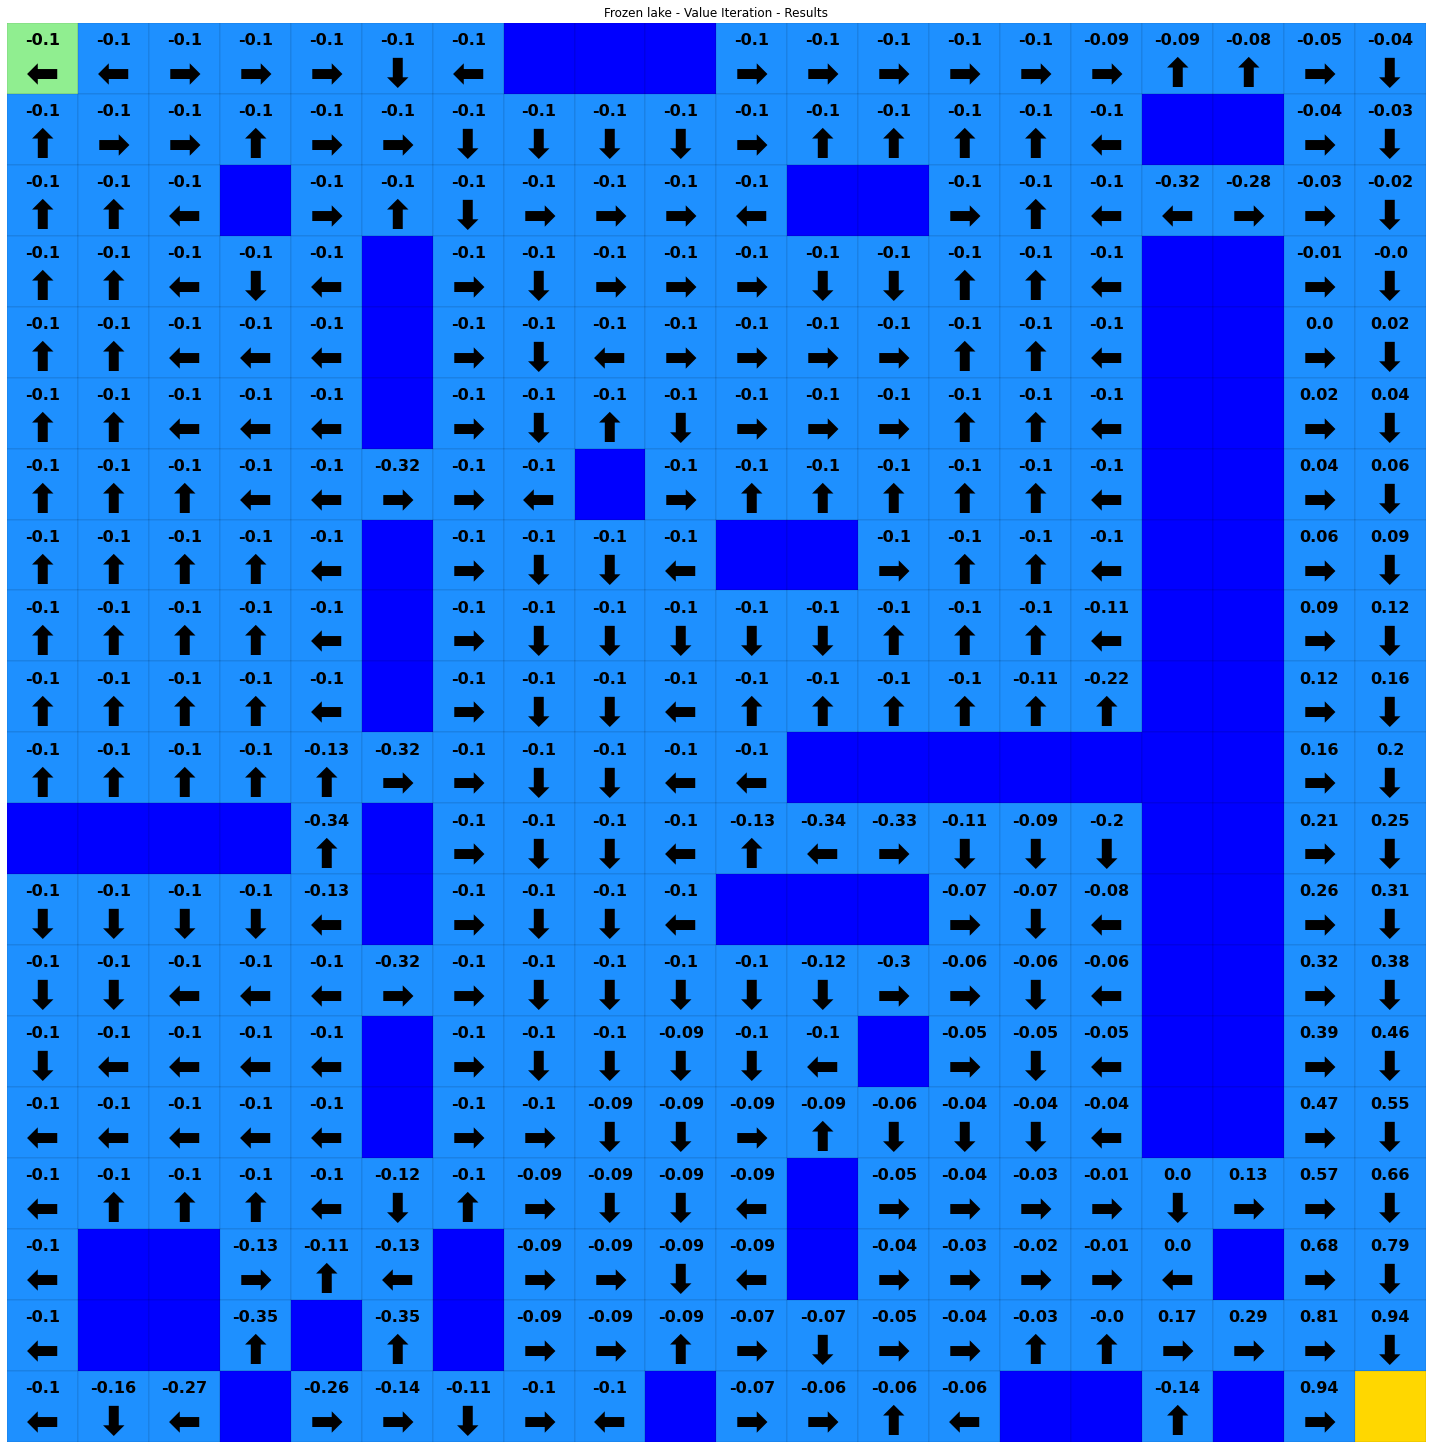

In [111]:
ax_results = plotting.plot_solver_results(env=lake, solver=lake_vi)
plt.title('Frozen lake - Value Iteration - Results')

# Frozen lake - Policy iteration

In [48]:
lake_pi = solvers.PolicyIteration(env=lake)
lake_pi.iterate_to_convergence()
lake_pi.converged()

True

In [79]:
df_pi_conv = lake_pi.iteration_data.to_dataframe()
df_pi_conv.tail()

,iteration,time,delta_max,delta_mean,policy_changes,converged
17,17,0.021097,0.000300,0.000024,2,False
18,18,0.020874,0.000269,0.000020,5,False
19,19,0.020248,0.000264,0.000015,1,False
20,20,0.019871,0.000205,0.000013,1,False
21,21,0.020474,0.000197,0.000010,0,True


Text(0.5, 1.0, 'Frozen Lake - Policy Iteration - Results')

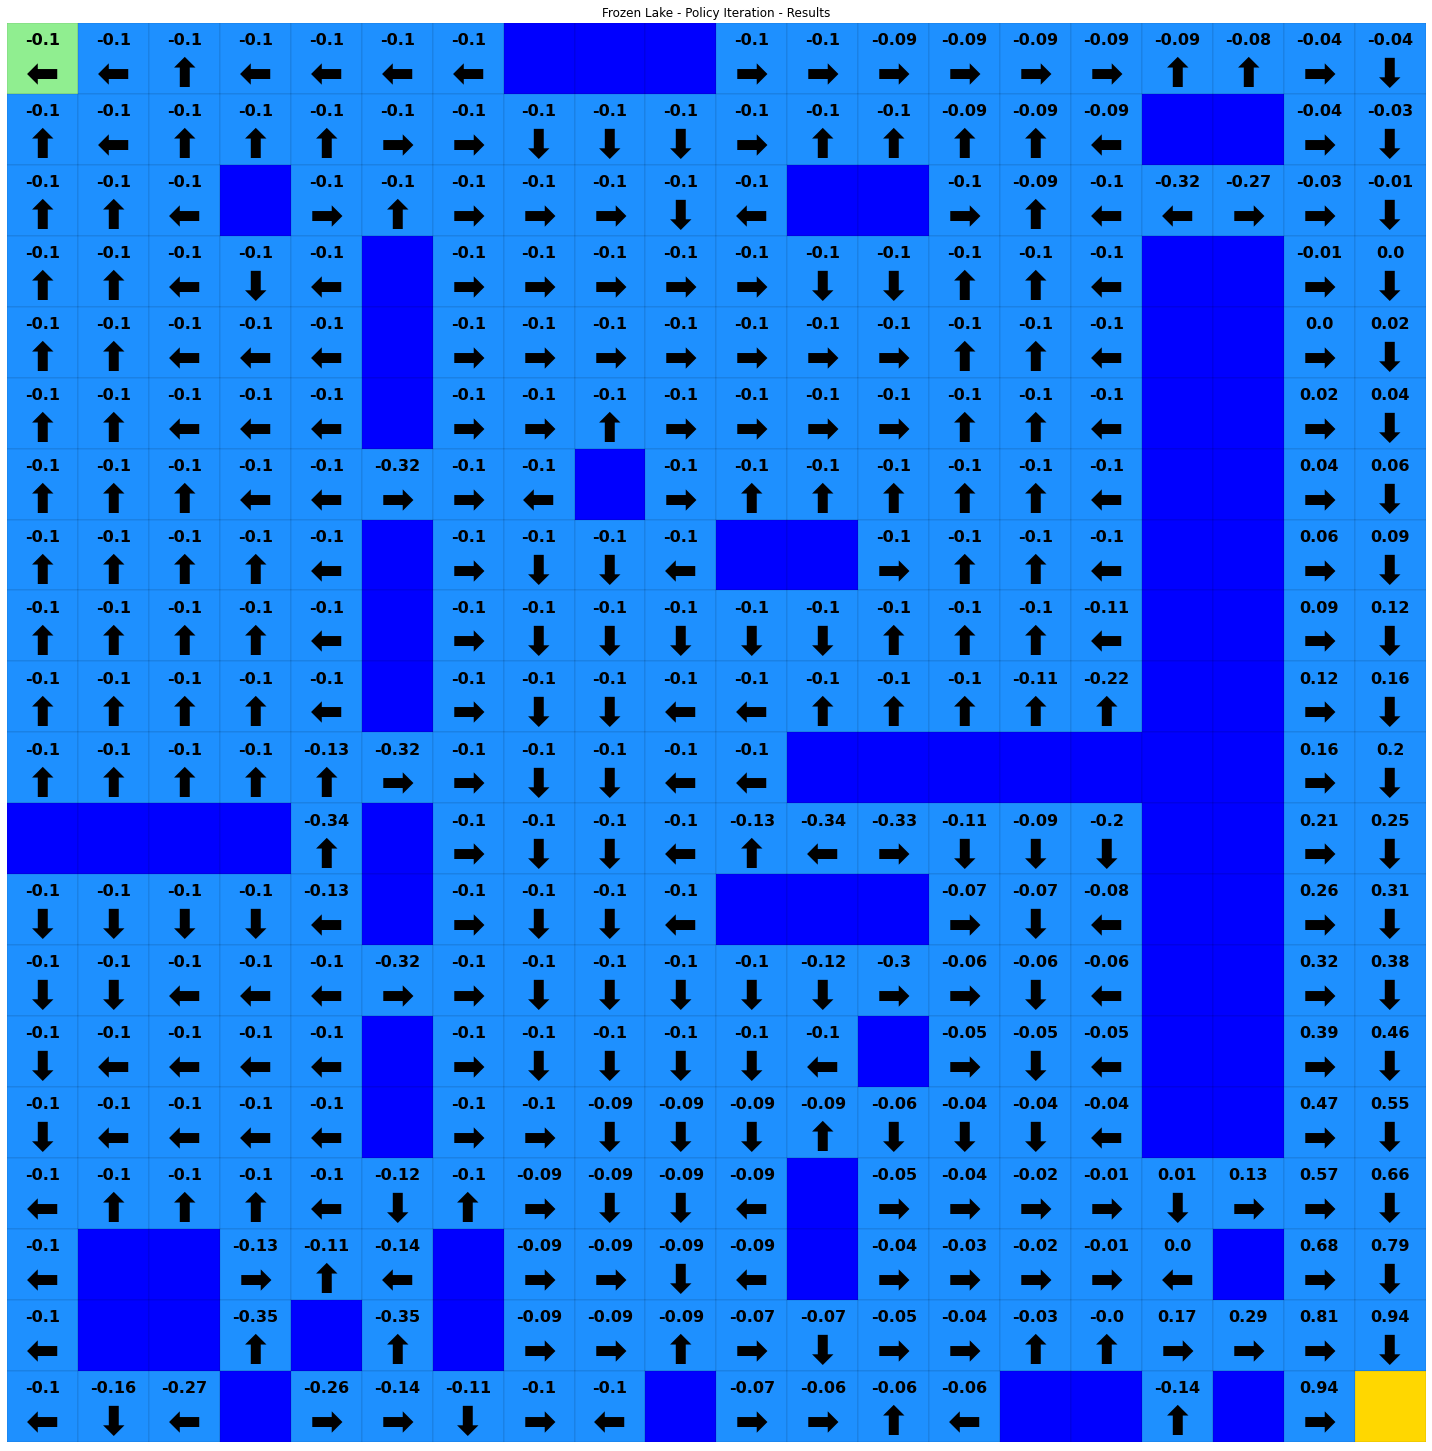

In [110]:
ax_results = plotting.plot_solver_results(env=lake, solver=lake_pi)
plt.title('Frozen Lake - Policy Iteration - Results')

In [92]:
scoring_data_pi = lake_pi.score_policy(iters=100)
df_pi = scoring_data_pi.to_dataframe(include_episodes=True)
df_pi.tail(3)

,episode_index,reward,steps,terminal,reward_mean,reward_median,reward_std,reward_min,reward_max,steps_mean,steps_median,steps_std,steps_min,steps_max,terminal_fraction,episodes
97,97,-1.0,101,False,-1.0,-1.0,2.220446e-16,-1.0,-1.0,101.0,101.0,0.0,101,101,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
98,98,-1.0,101,False,-1.0,-1.0,2.220446e-16,-1.0,-1.0,101.0,101.0,0.0,101,101,0.0,"[0, 20, 0, 0, 0, 20, 0, 20, 0, 0, 0, 0, 0, 0, ..."
99,99,-1.0,101,False,-1.0,-1.0,2.220446e-16,-1.0,-1.0,101.0,101.0,0.0,101,101,0.0,"[0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 20, 21, 20, 0,..."


In [109]:
df_pi['terminal'].value_counts()

False    100
Name: terminal, dtype: int64

Text(0.5, 1.0, 'Frozen Lake - Policy Iteration Episodes')

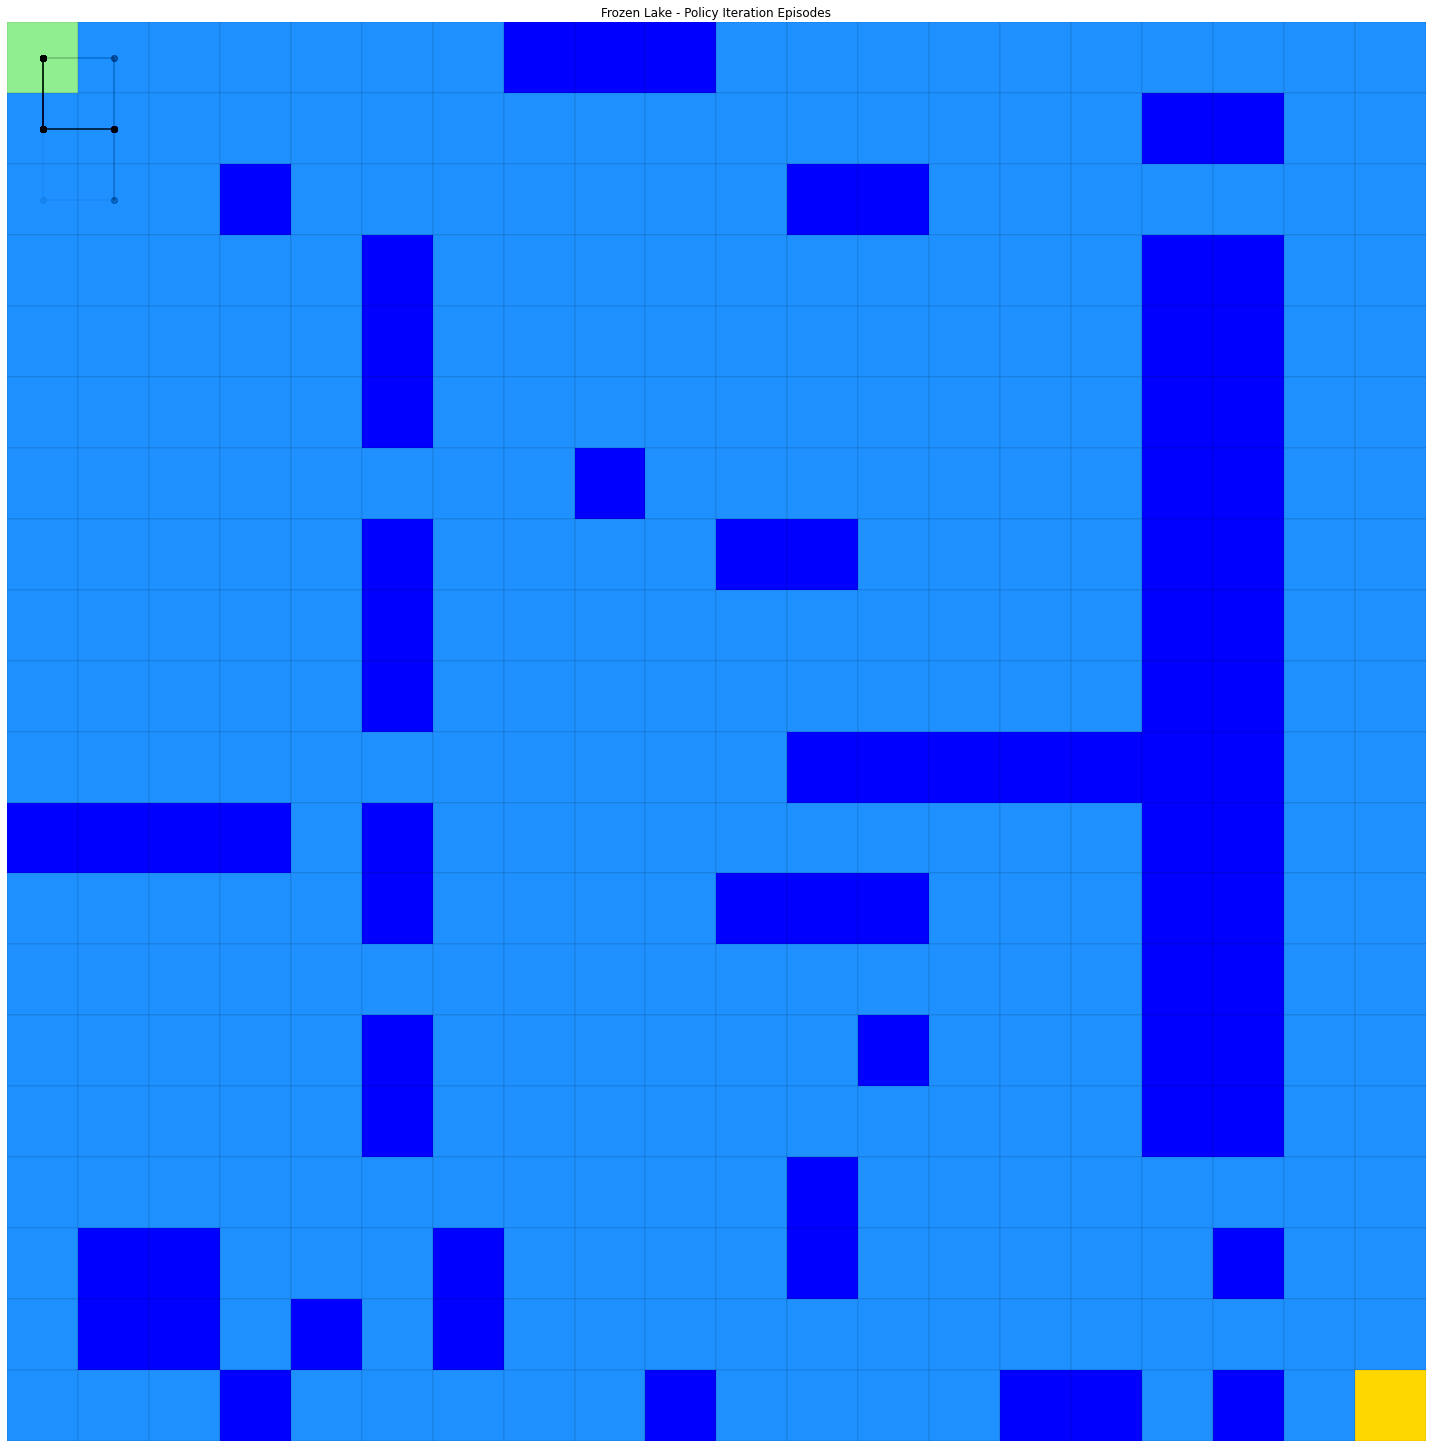

In [113]:
ax_episodes = plotting.plot_episodes(episodes=scoring_data_pi.episodes, env=lake, max_episodes=100, )
plt.title('Frozen Lake - Policy Iteration Episodes')

# Frozen Lake - Q Learning

In [0]:
"""
# Let's be explicit with our QLearning settings for alpha and epsilon
alpha = 0.1  # Constant alpha during learning

# Decay function for epsilon (see QLearning() and decay_functions() in documentation for syntax)
# Decay epsilon linearly from 0.2 at timestep (iteration) 0 to 0.05 at timestep 1500, 
# keeping constant at 0.05 for ts>1500
epsilon = {
    'type': 'linear',
    'initial_value': 0.2, 
    'initial_timestep': 0,
    'final_value': 0.05, 
    'final_timestep': 1500
}

# Above PI/VI used the default gamma, but we will specify one here
gamma = 0.9

# Convergence is kinda tough to interpret automatically for Q-Learning.  One good way to monitor convergence is to
# evaluate how good the greedy policy at a given point in the solution is and decide if it is still improving.
# We can enable this with score_while_training (available for Value and Policy Iteration as well)
# NOTE: During scoring runs, the solver is acting greedily and NOT learning from the environment.  These are separate
#       runs solely used to estimate solution progress
# NOTE: Scoring every 50 iterations is probably a bit much, but used to show a nice plot below.  The default 500/500 
#       is probably a better general guidance
score_while_training = {
    'n_trains_per_eval': 50,  # Number of training episodes we run per attempt to score the greedy policy 
                               # (eg: Here we do a scoring run after every 500 training episodes, where training episodes
                               # are the usual epsilon-greedy exploration episodes)
    'n_evals': 250,  # Number of times we run through the env with the greedy policy whenever we score
}
# score_while_training = True  # This calls the default settings, which are also 500/500 like above

lake_ql = solvers.QLearning(env=lake, alpha=alpha, epsilon=epsilon, gamma=gamma,
                          max_iters=5000, score_while_training=score_while_training)
"""

In [190]:
lake_ql = solvers.QLearning(env=lake)
lake_ql.iterate_to_convergence()
lake_ql.converged()

True

In [191]:
df_ql_conv = lake_ql.iteration_data.to_dataframe()
df_ql_conv.tail()

,iteration,time,delta_max,policy_changes,alpha,epsilon,converged
246,246,0.015463,0.090775,28,0.090775,0.2254,False
247,247,0.016601,0.074347,19,0.090737,0.2253,False
248,248,0.019795,0.003000,19,0.090700,0.2252,False
249,249,0.020843,0.001308,20,0.090663,0.2251,False
250,250,0.010600,0.069635,15,0.090625,0.2250,True


Text(0, 0.5, 'Time')

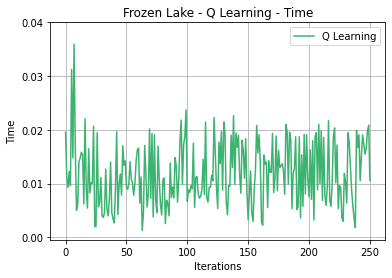

In [192]:
plt.plot(df_ql_conv['iteration'], df_ql_conv['time'], label='Q Learning', color='mediumseagreen')
plt.yticks([0, 0.01, 0.02, 0.03, 0.04])
plt.grid()
plt.legend()
plt.title('Frozen Lake - Q Learning - Time')
plt.xlabel('Iterations')
plt.ylabel('Time')

Text(0, 0.5, 'delta max')

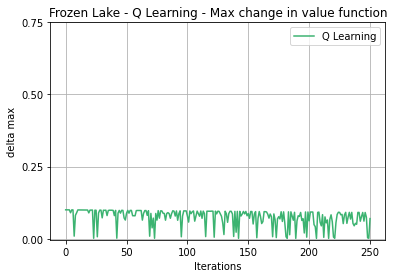

In [204]:
plt.plot(df_ql_conv['iteration'], df_ql_conv['delta_max'], label='Q Learning', color='mediumseagreen')
plt.yticks([0, 0.25, 0.5, 0.75])
plt.grid()
plt.legend()
plt.title('Frozen Lake - Q Learning - Max change in value function')
plt.xlabel('Iterations')
plt.ylabel('delta max')

Text(0.5, 1.0, 'Frozen lake - Q Learning - Results')

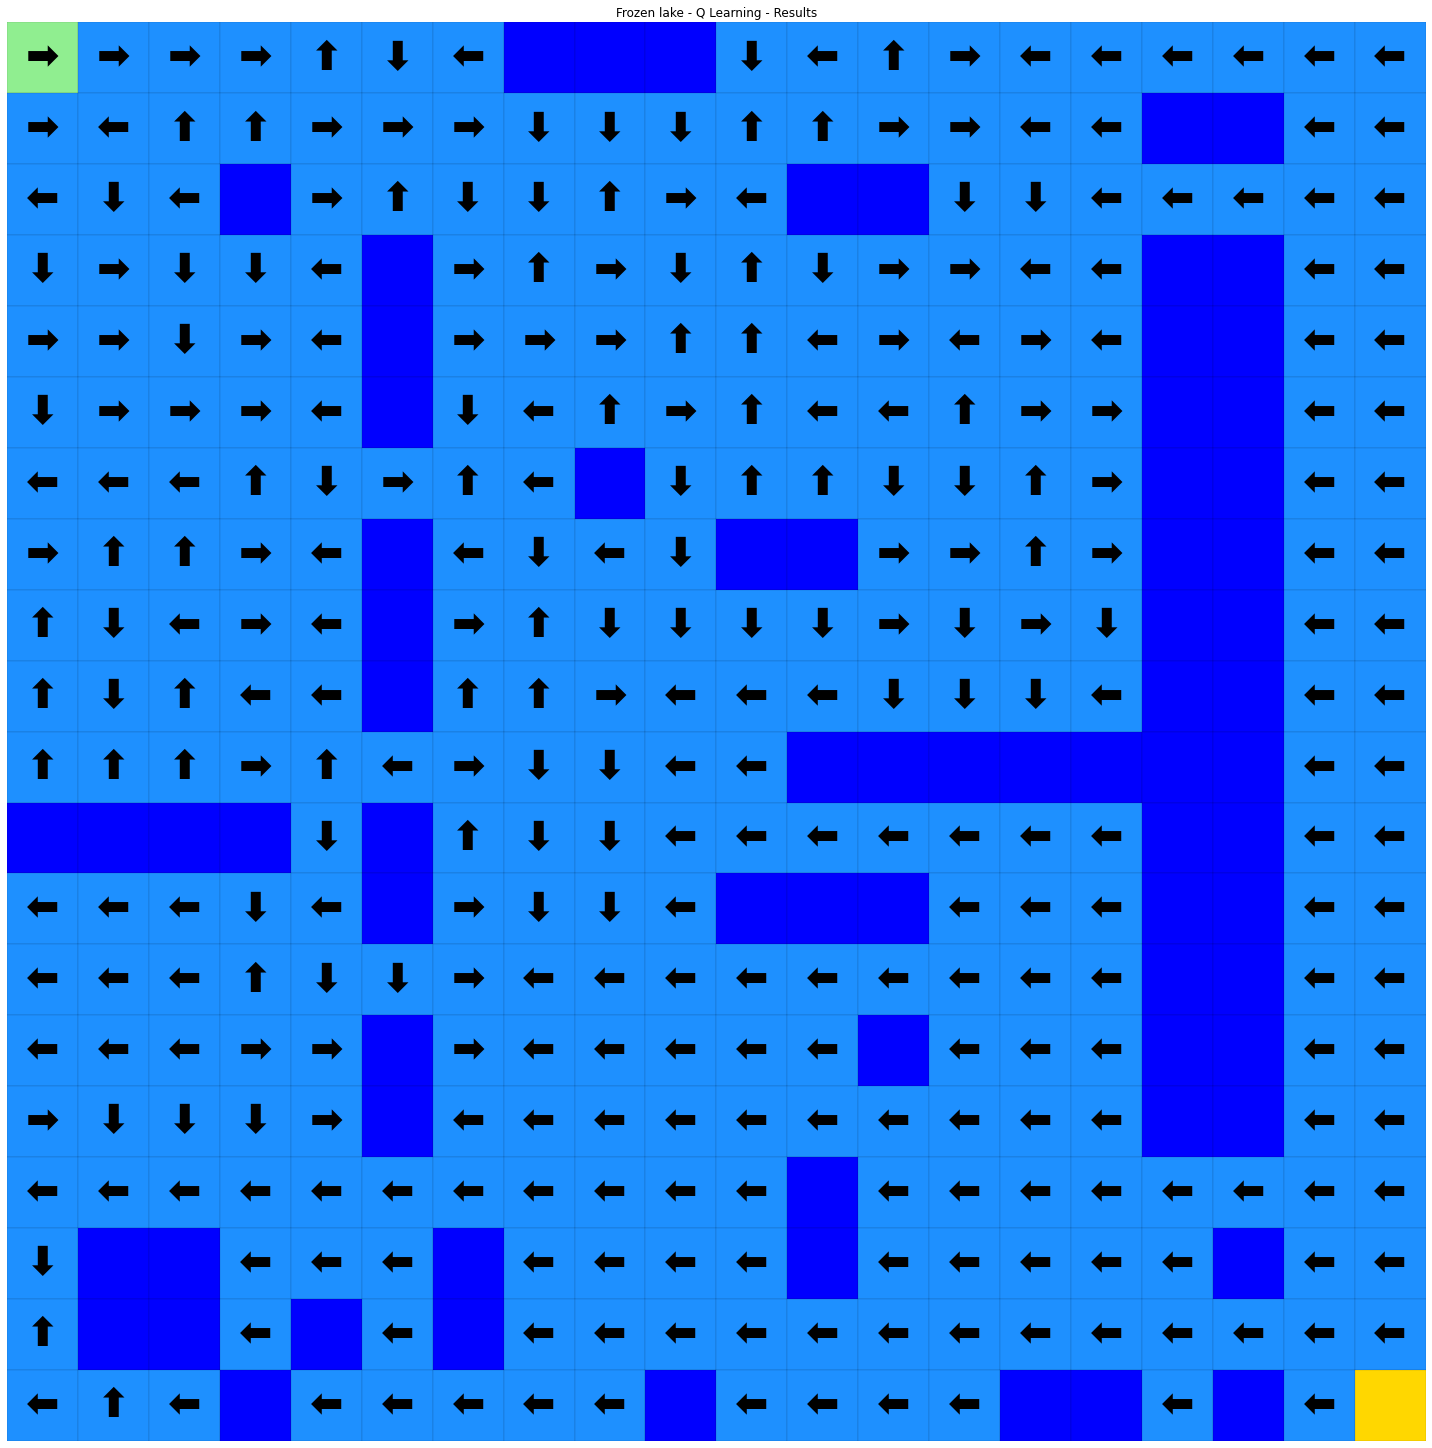

In [194]:
ax_results = plotting.plot_solver_results(env=lake, solver=lake_ql)
plt.title('Frozen lake - Q Learning - Results')

In [195]:
scoring_data_ql = lake_ql.score_policy(iters=100)
df_ql = scoring_data_ql.to_dataframe(include_episodes=True)
df_ql.tail(3)

,episode_index,reward,steps,terminal,reward_mean,reward_median,reward_std,reward_min,reward_max,steps_mean,steps_median,steps_std,steps_min,steps_max,terminal_fraction,episodes
97,97,-1.00,101,False,-1.295816,-1.0,0.347322,-1.99,-1.0,85.122449,101.0,21.739302,31,101,0.459184,"[0, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
98,98,-1.00,101,False,-1.292828,-1.0,0.346827,-1.99,-1.0,85.282828,101.0,21.687421,31,101,0.454545,"[0, 1, 2, 2, 3, 23, 24, 25, 5, 25, 26, 27, 47,..."
99,99,-1.48,50,True,-1.294700,-1.0,0.345591,-1.99,-1.0,84.930000,101.0,21.862413,31,101,0.460000,"[0, 1, 2, 3, 4, 4, 4, 4, 3, 4, 4, 5, 25, 26, 2..."


Text(0.5, 1.0, 'Frozen Lake - Q Learning - Episodes')

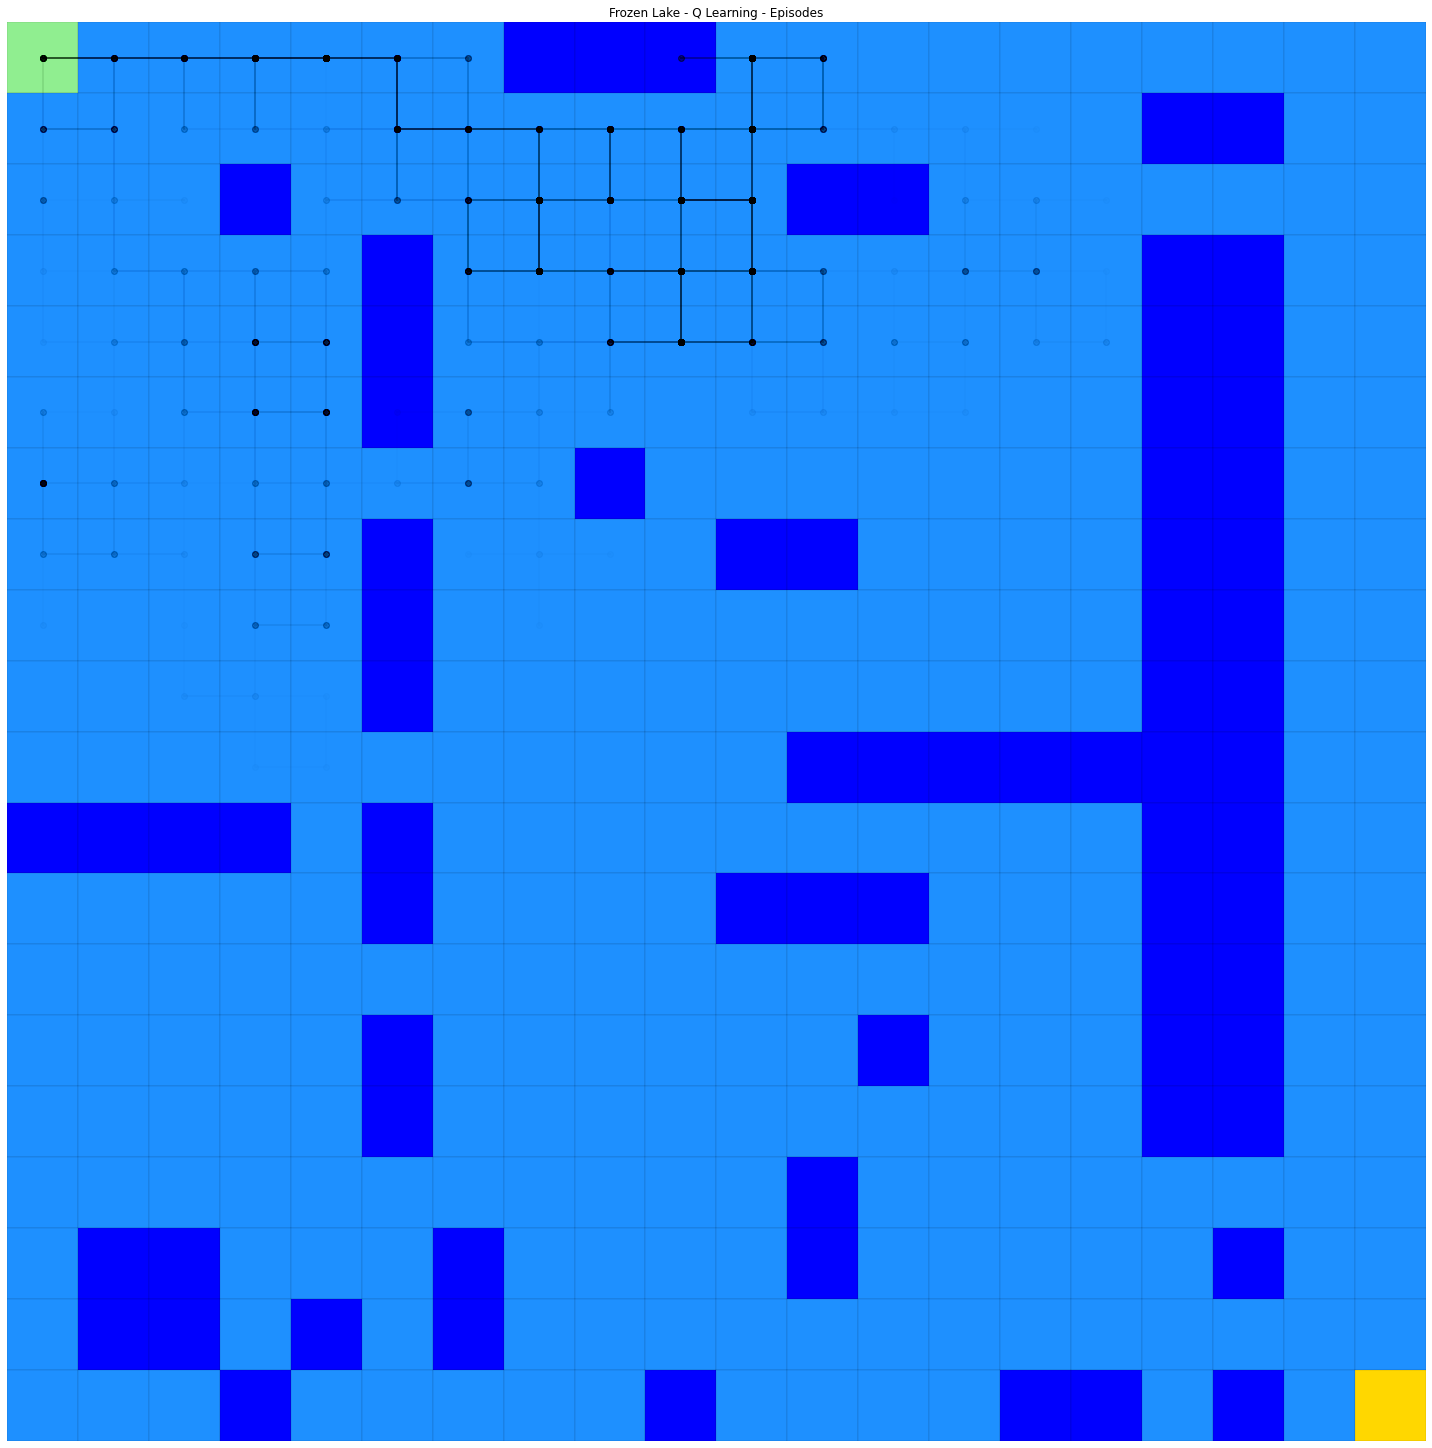

In [196]:
ax_episodes = plotting.plot_episodes(episodes=scoring_data_ql.episodes, env=lake, max_episodes=250, )
plt.title('Frozen Lake - Q Learning - Episodes')

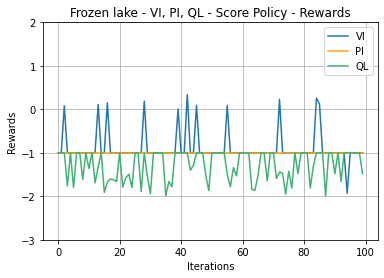

In [197]:
plt.plot(df_vi['episode_index'], df_vi['reward'], label='VI')
plt.plot(df_pi['episode_index'], df_pi['reward'], label='PI', color='orange')
plt.plot(df_ql['episode_index'], df_ql['reward'], label='QL', color='mediumseagreen')
plt.title('Frozen lake - VI, PI, QL - Score Policy - Rewards')
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.yticks([-3,-2,-1, 0,1, 2])
plt.legend()
plt.grid()
plt.show()

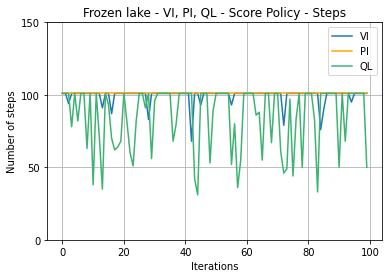

In [198]:
plt.plot(df_vi['episode_index'], df_vi['steps'], label='VI')
plt.plot(df_pi['episode_index'], df_pi['steps'], label='PI', color='orange')
plt.plot(df_ql['episode_index'], df_ql['steps'], label='QL', color='mediumseagreen')
plt.title('Frozen lake - VI, PI, QL - Score Policy - Steps')
plt.xlabel('Iterations')
plt.ylabel('Number of steps')
plt.yticks([0, 50, 100, 150])
plt.legend()
plt.grid()
plt.show()

# Frozen lake VI vs PI vs Q Learning comparison

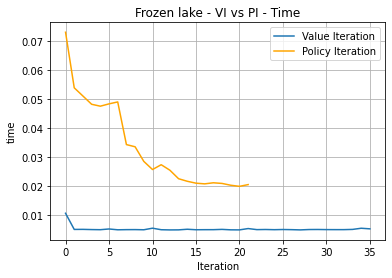

In [199]:
ax = plotting.plot_solver_convergence(lake_vi, y='time', x='iteration', label='Value Iteration')
#plotting.plot_solver_convergence(lake_ql, y='time', x='iteration', label='Q Learning', color='mediumseagreen')
ax = plotting.plot_solver_convergence_from_df(df_pi_conv, 
                                              y='time', x='iteration', ax=ax, 
                                              label='Policy Iteration', color='orange')

plt.title('Frozen lake - VI vs PI - Time')
plt.legend()
plt.grid()

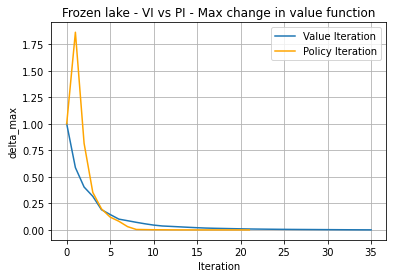

In [200]:
ax = plotting.plot_solver_convergence(lake_vi, y='delta_max', x='iteration', label='Value Iteration')

# Or going a little deeper into the API, with style being passed to matplotlib's plot function...
ax = plotting.plot_solver_convergence_from_df(lake_pi.iteration_data.to_dataframe(),
                                              y='delta_max', x='iteration', ax=ax, 
                                              label='Policy Iteration', color='orange')

plt.title('Frozen lake - VI vs PI - Max change in value function')
plt.legend()
plt.grid()

In [70]:
import numpy as np
np.arange(2)

array([0, 1])

Text(0.5, 1.0, 'Frozen Lake - Algorithms - Convergence Iterations')

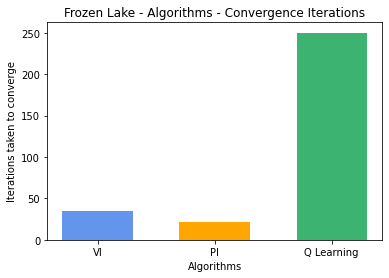

In [201]:
plt.bar([0,1,2], height= [35,21, 250], width=0.6, color=['cornflowerblue', 'orange','mediumseagreen']) 
plt.xticks([0,1,2], ['VI', 'PI', 'Q Learning'])
plt.xlabel('Algorithms')
plt.ylabel('Iterations taken to converge')
plt.title('Frozen Lake - Algorithms - Convergence Iterations')

Text(0.5, 1.0, 'Frozen Lake - Algorithms - Convergence Time')

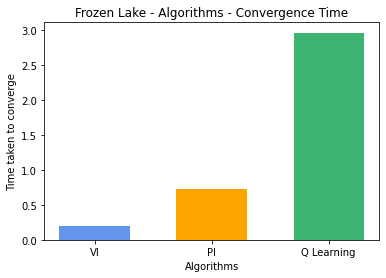

In [219]:
plt.bar([0,1,2], height= [df_vi_conv['time'].sum(), df_pi_conv['time'].sum(), df_ql_conv['time'].sum()],
        width=0.6, color=['cornflowerblue', 'orange', 'mediumseagreen']) 
plt.xticks([0,1,2], ['VI', 'PI', 'Q Learning'])
plt.xlabel('Algorithms')
plt.ylabel('Time taken to converge')
plt.title('Frozen Lake - Algorithms - Convergence Time')